In [6]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns





In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
df["SOP"].value_counts()
# column--- less than 10 unique values in numb--- categorical

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
df["LOR "].value_counts() #less than 10 -- categorical

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


In [13]:
# Check whether there are empty rows or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [14]:
df["Research"].value_counts()

,count
Research,
1,219
0,181


- Drop serial number column
-describe
-missing values
-duplicates
-outliers
-distrubution
-data inconsist
-visualisations
-corelations
-linearity( LR)
-encoding?
-stand/ normalisation

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [15]:
# drop the serial column
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [16]:
#check for missing values
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [17]:
#chekc for duplicates
df.duplicated().sum()

np.int64(0)

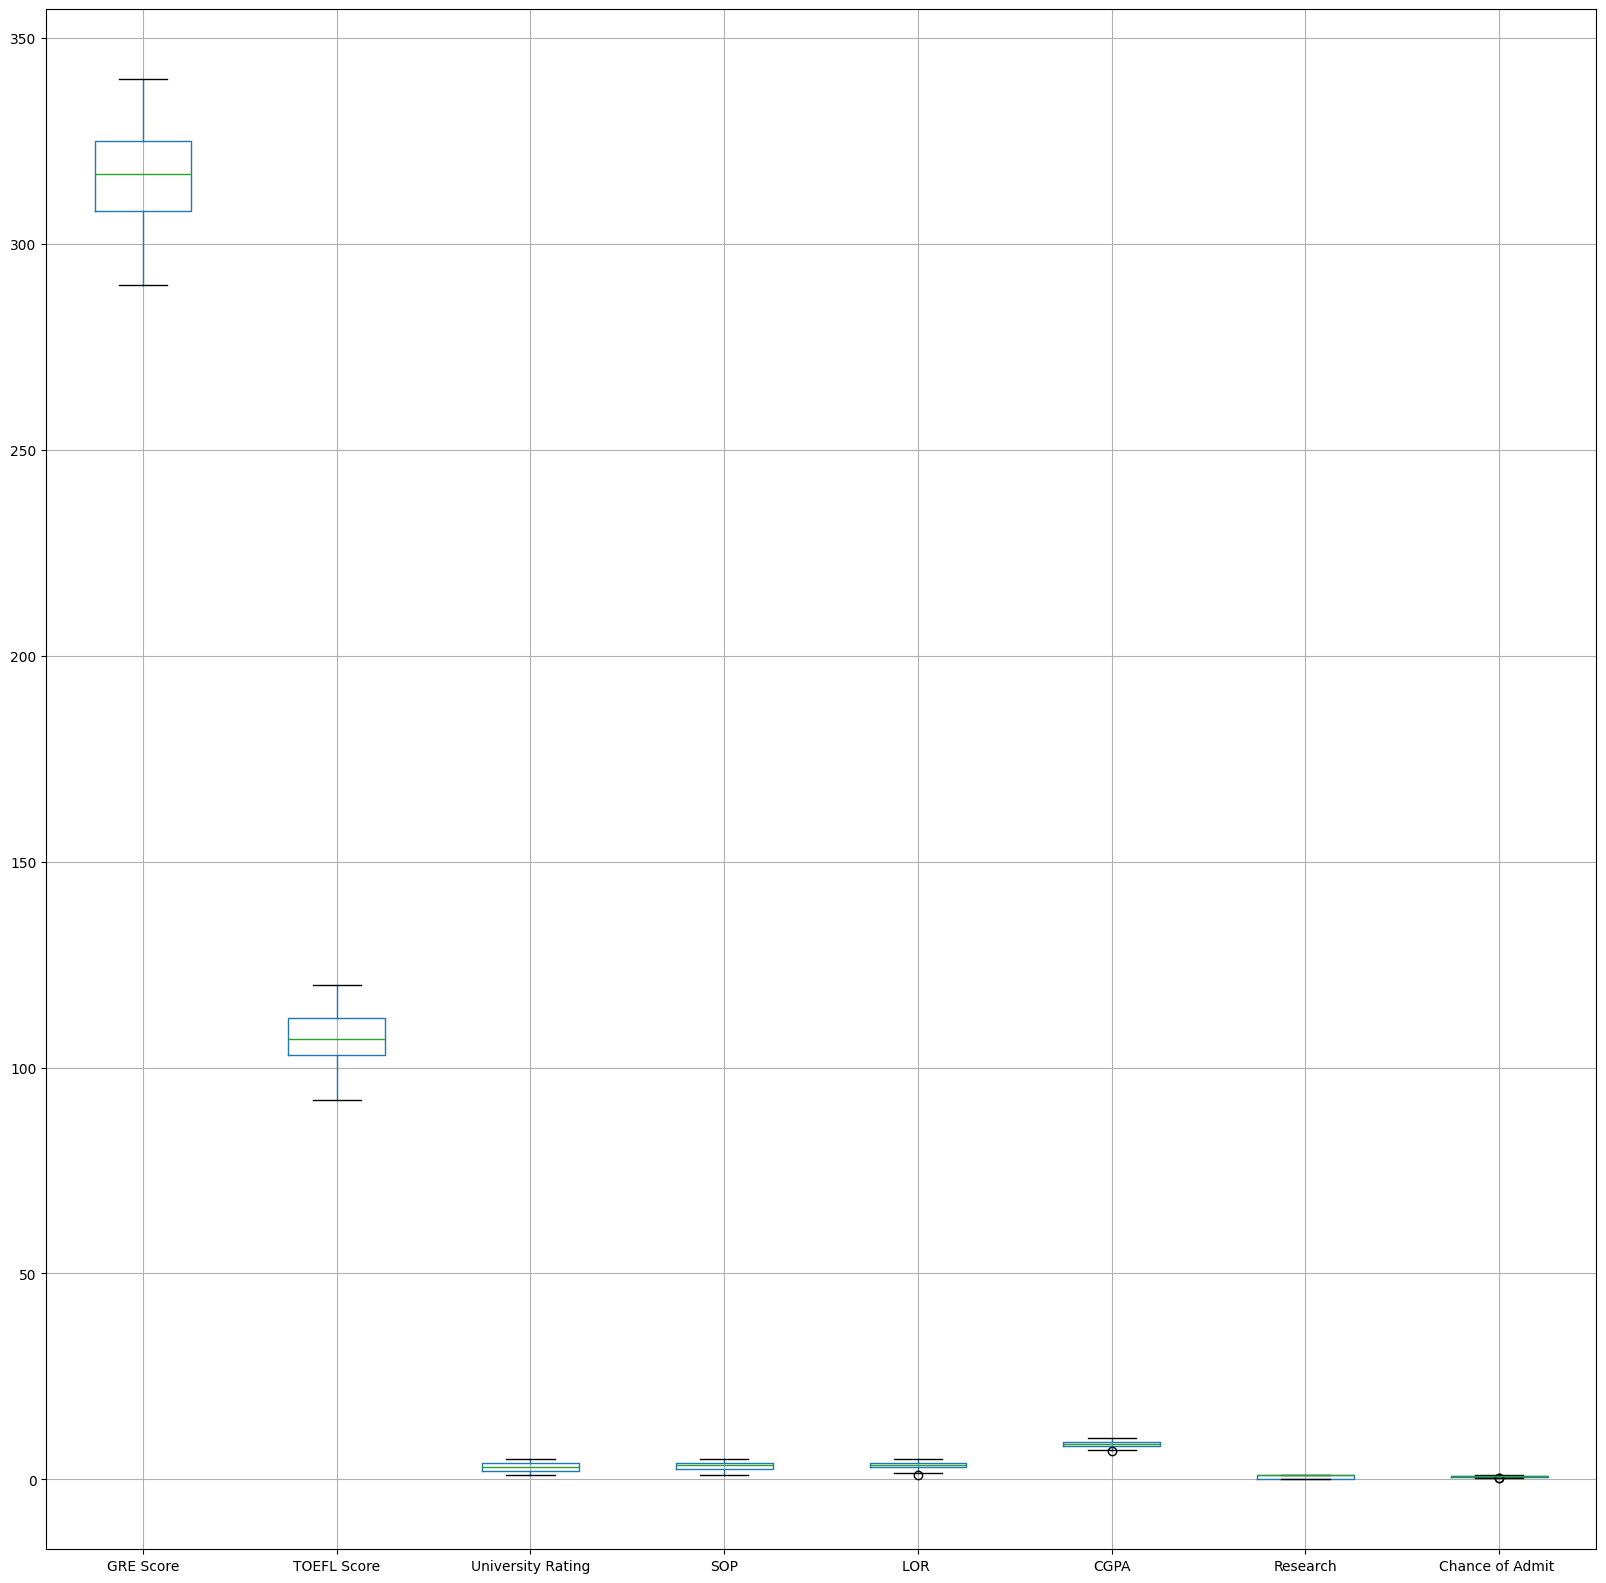

In [18]:
#check fro outliers in whole data
df.boxplot(figsize=(20,20))
plt.show()

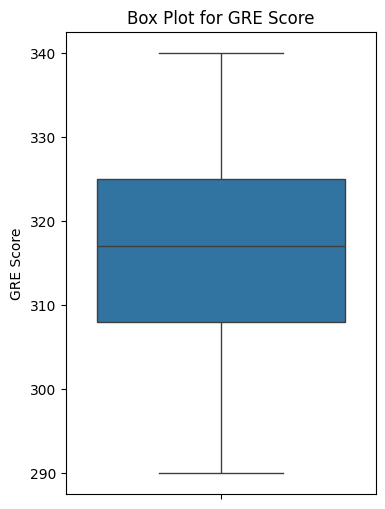

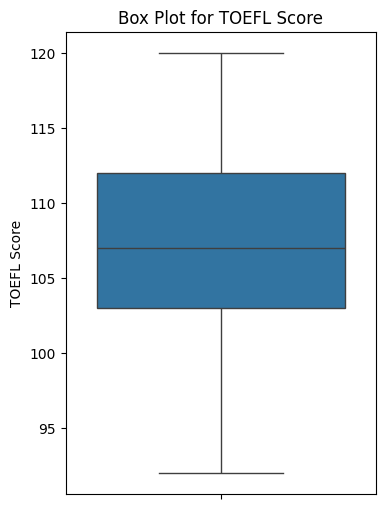

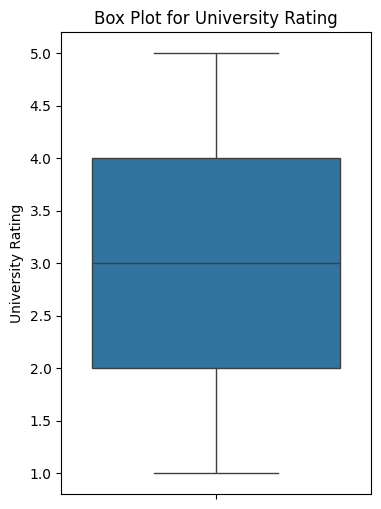

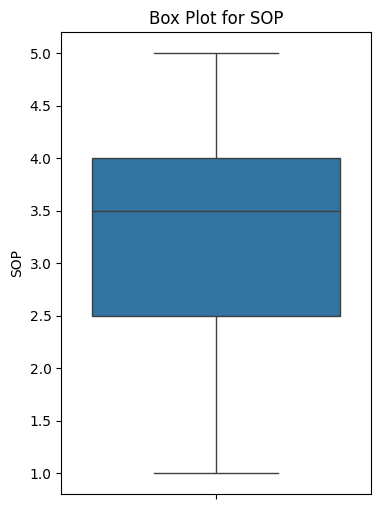

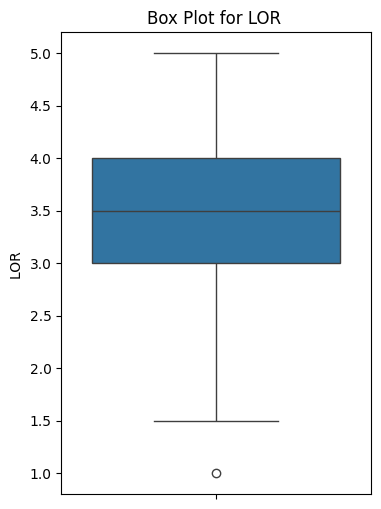

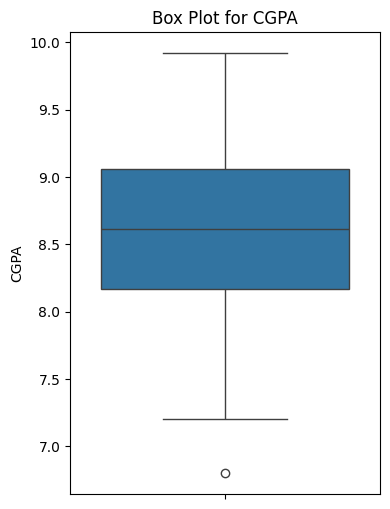

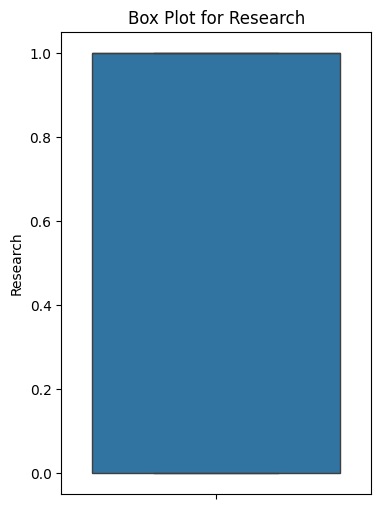

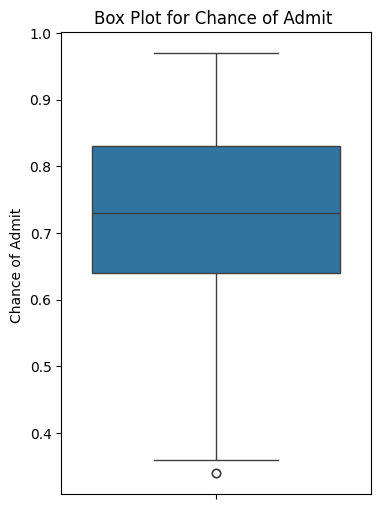

In [19]:
for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

In [20]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
#check the row with 1 lor
df[df["LOR "] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [22]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


In [23]:
# SOp and LOR are cate or cont
#sop 1-5
#lor 1-5
df["SOP"].unique()
#min -1
#max-5

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [24]:
df["SOP"].value_counts()

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [25]:
df["LOR "].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [26]:
# data inconsistencies in Categorical columns
print(df["Research"].unique())
print(df["University Rating"].unique())

[1 0]
[4 3 2 5 1]


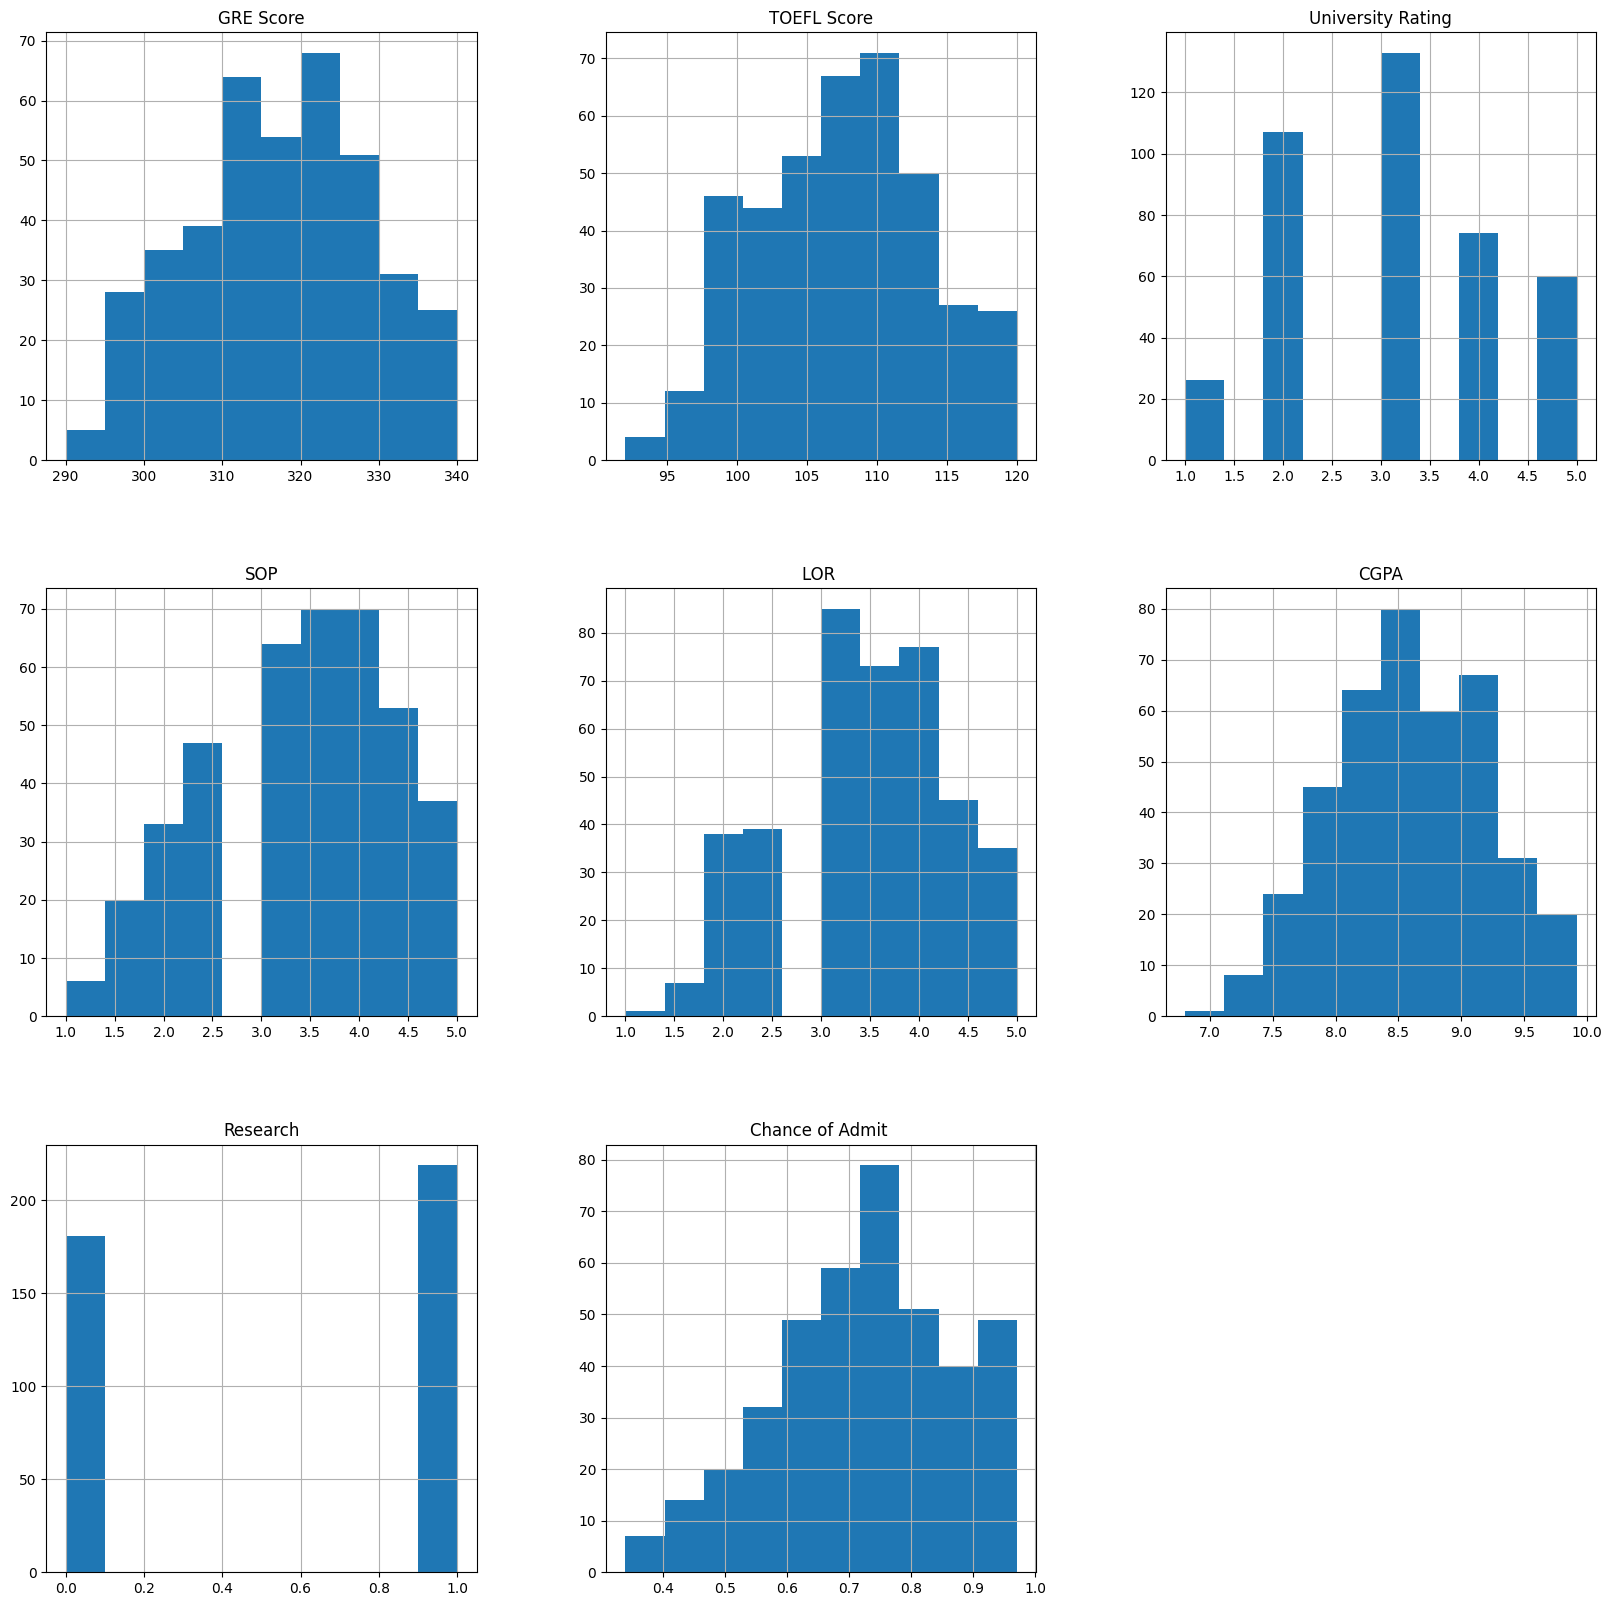

In [27]:
# distribution of numerical variable
df.hist(figsize=(20,20))
plt.show()

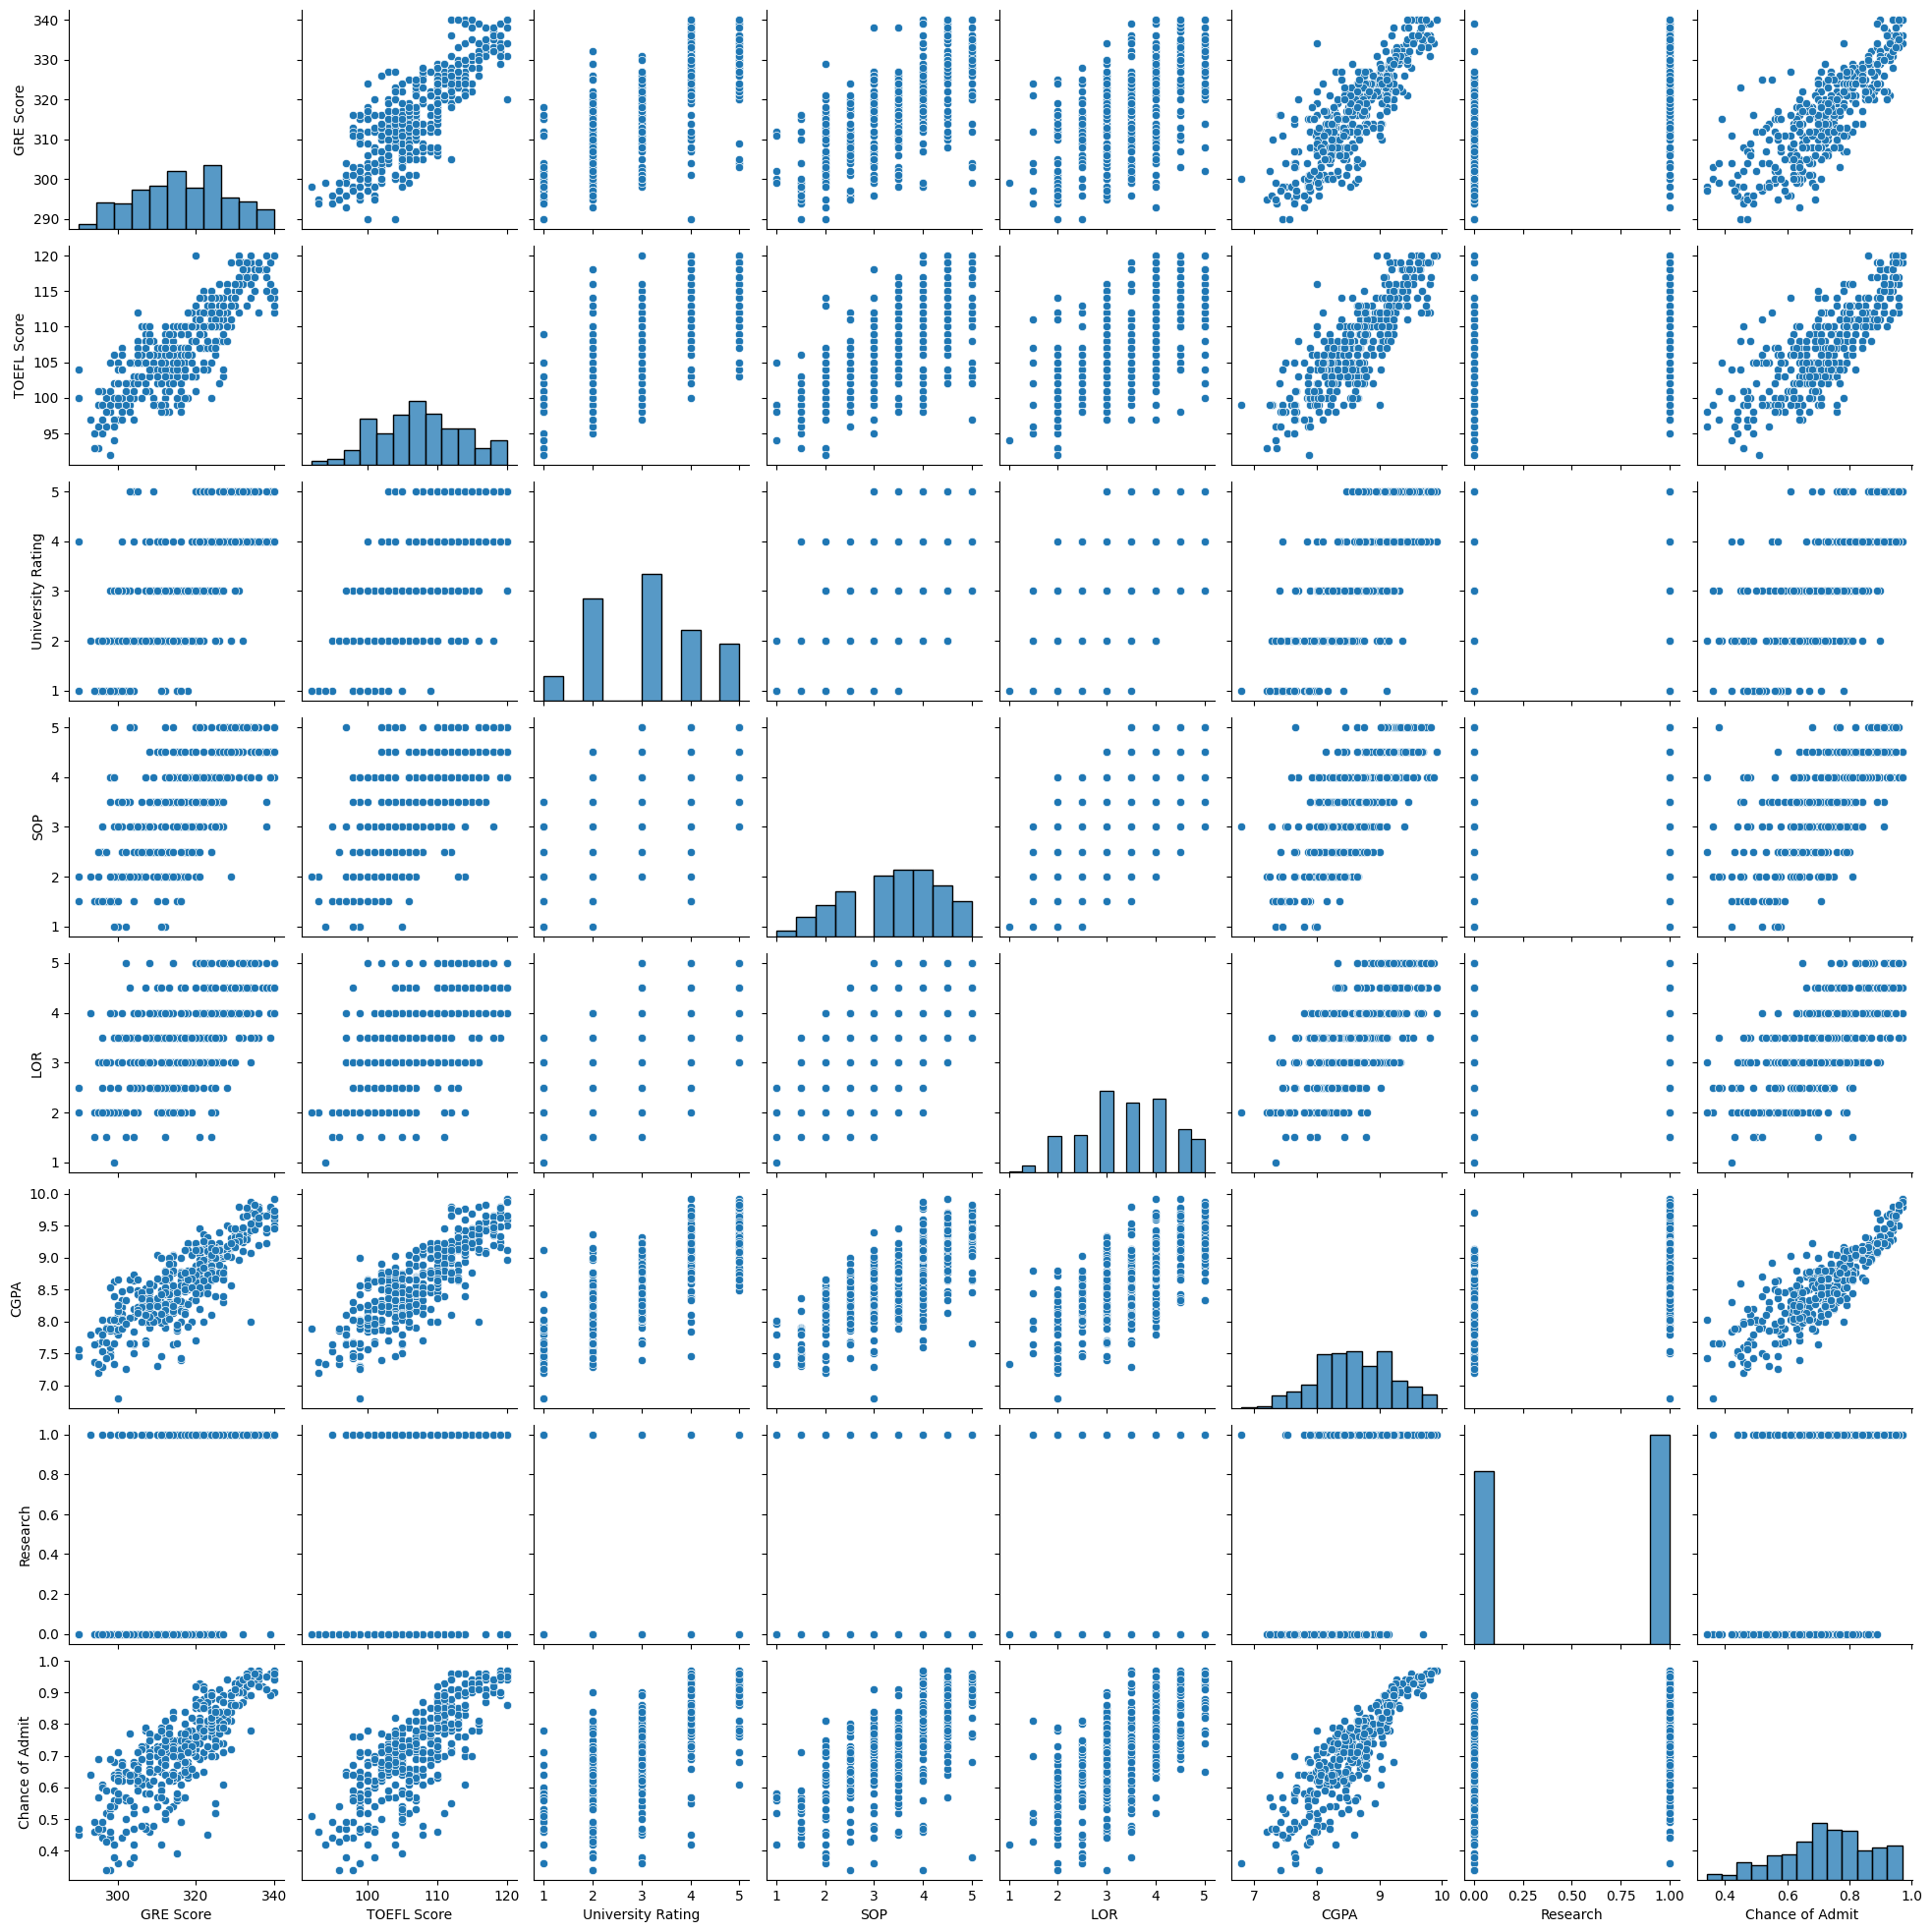

In [28]:
# linearity with chances of admission
sns.pairplot(df)
plt.show()

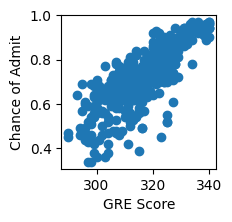

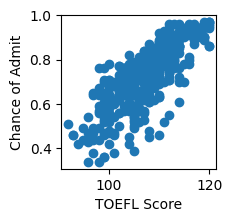

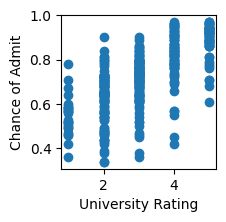

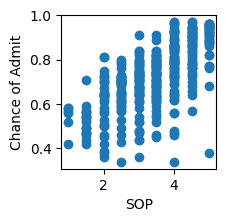

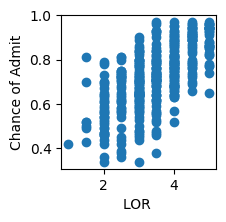

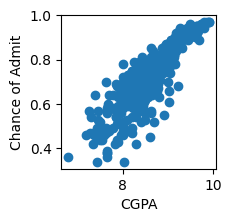

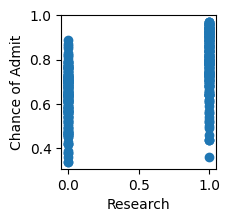

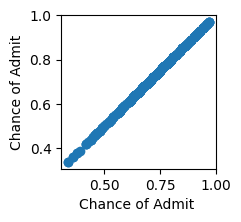

In [29]:
# scatter plot
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
  plt.show()

Tofel, gre, cgpa are highly linear with output( chances Of admissions)

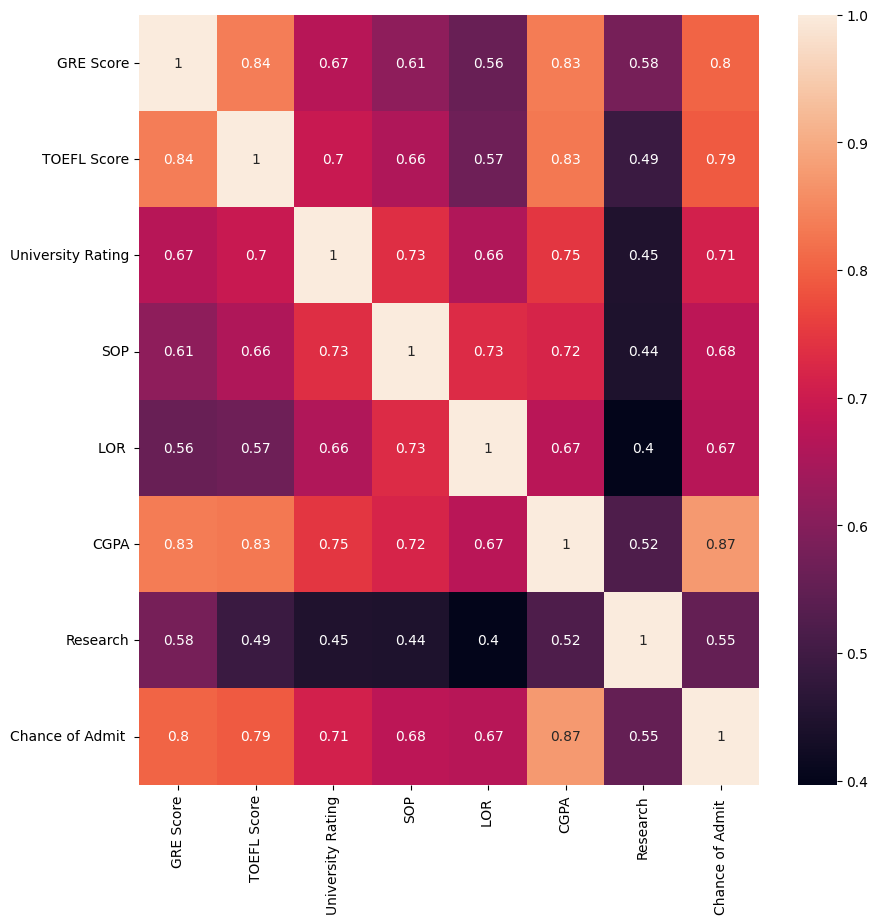

In [30]:
#heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

CGPA, GRE and TOFL are highly corelated with o/p

many columns highlhy multicolinear!--- LR a good choice?-- NO

try for DT and RF

In [31]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [32]:
# scaling of all data except chance of admission
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

In [33]:

#convert the response to df
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


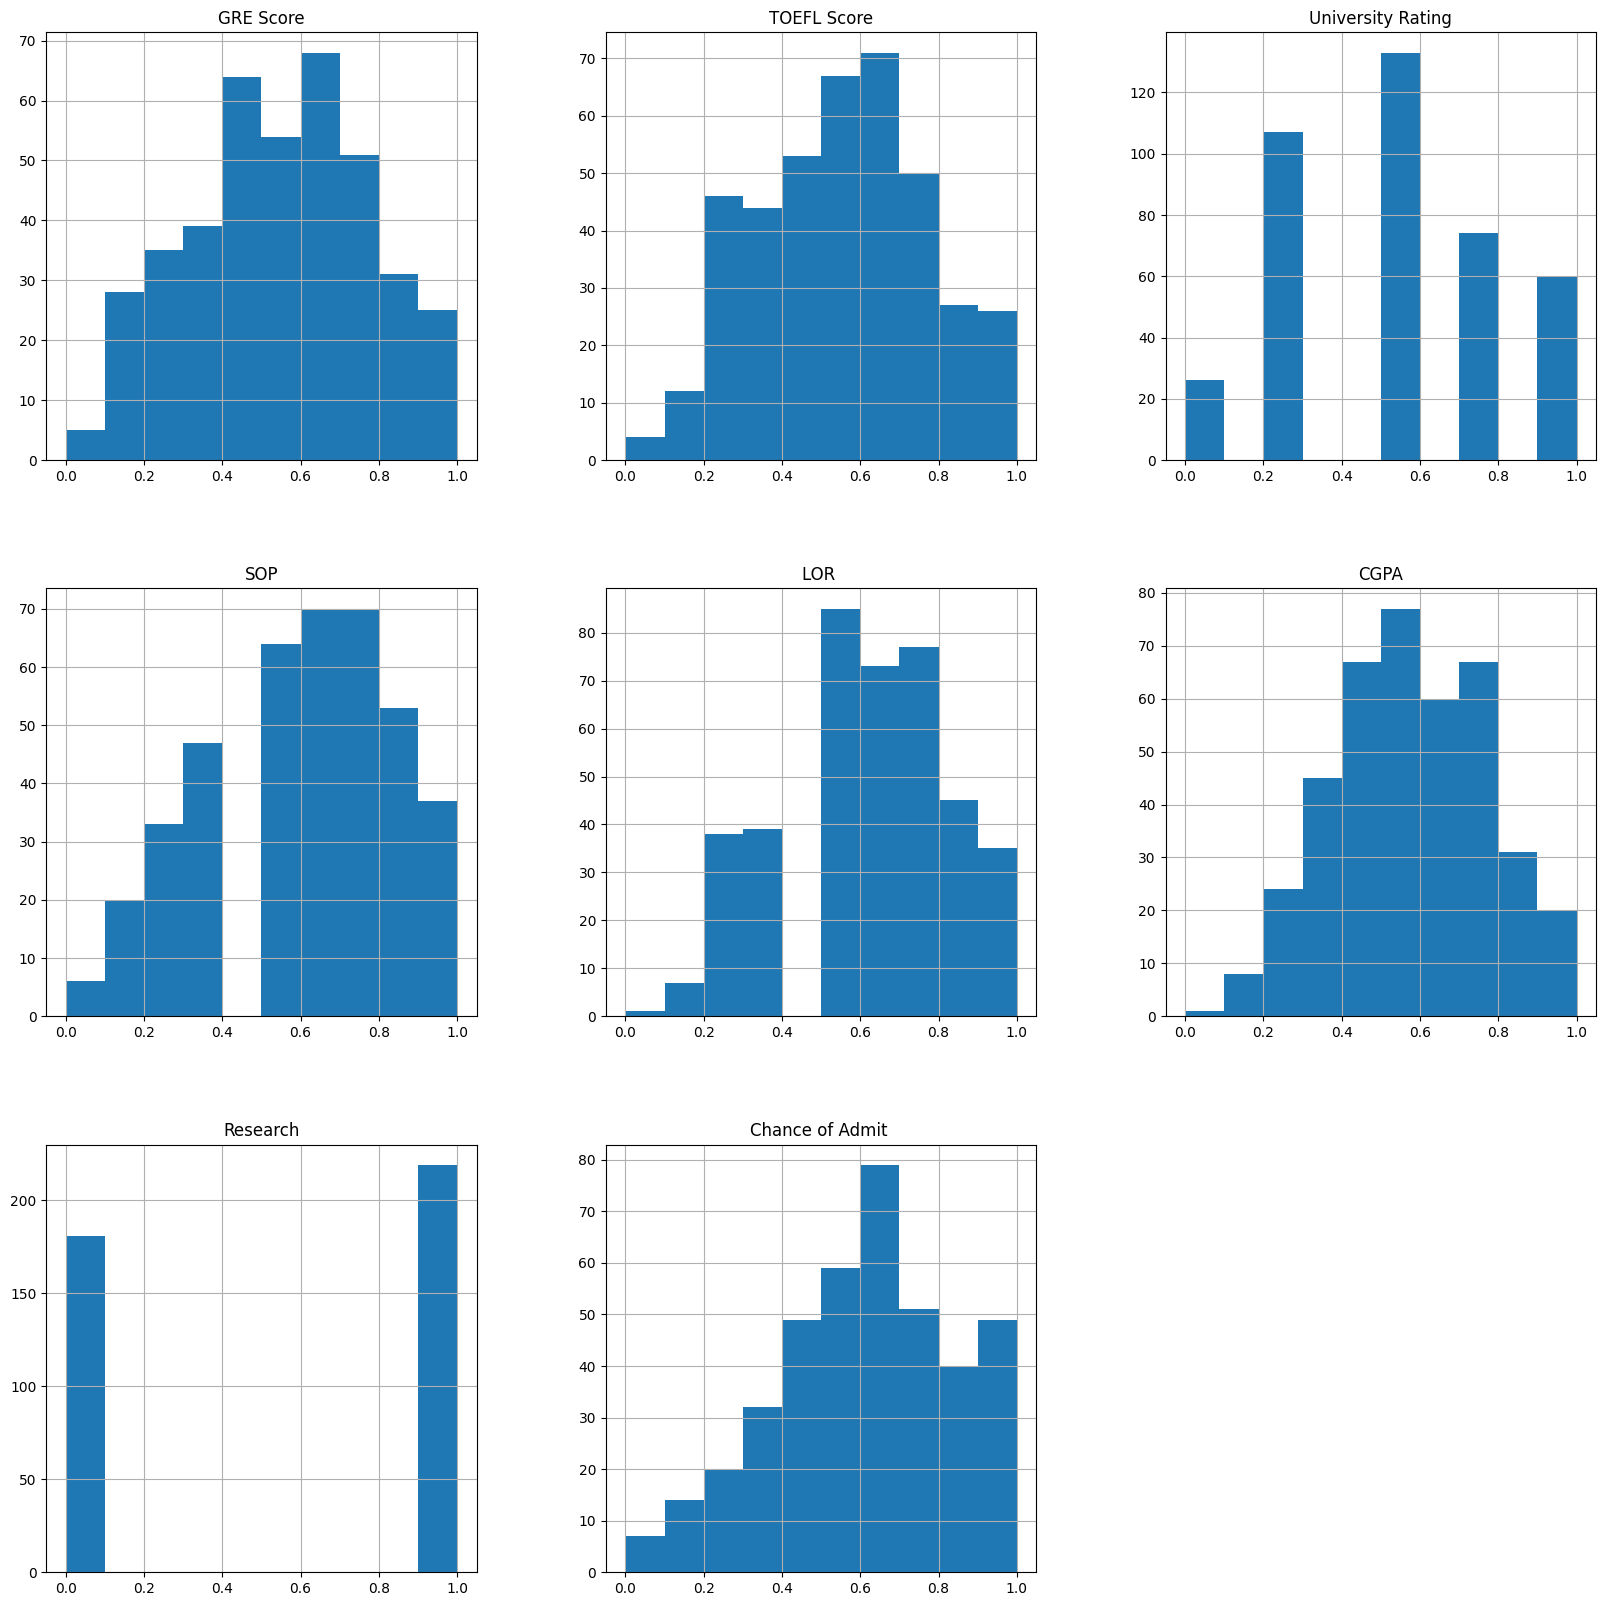

In [34]:
#historgram of scaled data
df_scaled.hist(figsize=(20,20))
plt.show()

In [35]:
#z score normalisation/ standardisation--- shape of the data -- sclae data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled


StandardScaler()

In [36]:
df_scaled

StandardScaler()

In [37]:
# Sklearn library
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [38]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

# Reshape
x = df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit "].values.reshape(-1,1)
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


Now, we can use above x&y axises on the fit operation of the linear regression model.

In [39]:
linear_reg.fit(x,y)

LinearRegression()

<a id="11"></a> <br>
**1.1. Prediction**

We will predict the values according to linear_reg model.

<a id="12"></a> <br>
**1.2. R Square (LR)**

We can evaluate the linear regression model performance with R Square.
* y: Chance of Admit values
* y_head: predicted Chance of Admit value

First, we must be sure that y and y_head values are using the same number of samples. If not, we will get an error like this:

ValueError: Found input variables with inconsistent numbers of samples: [500, 312]

In [40]:
#training and testing split
#400- 320 training & 80- testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [42]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [43]:
y_train

array([[0.8 ],
       [0.63],
       [0.97],
       [0.74],
       [0.58],
       [0.56],
       [0.8 ],
       [0.66],
       [0.93],
       [0.64],
       [0.64],
       [0.83],
       [0.47],
       [0.76],
       [0.71],
       [0.66],
       [0.79],
       [0.78],
       [0.59],
       [0.72],
       [0.71],
       [0.61],
       [0.66],
       [0.61],
       [0.79],
       [0.68],
       [0.62],
       [0.71],
       [0.73],
       [0.62],
       [0.77],
       [0.53],
       [0.56],
       [0.46],
       [0.86],
       [0.48],
       [0.46],
       [0.93],
       [0.74],
       [0.8 ],
       [0.65],
       [0.68],
       [0.65],
       [0.42],
       [0.97],
       [0.85],
       [0.73],
       [0.75],
       [0.64],
       [0.81],
       [0.84],
       [0.81],
       [0.77],
       [0.82],
       [0.71],
       [0.77],
       [0.82],
       [0.71],
       [0.84],
       [0.8 ],
       [0.64],
       [0.78],
       [0.56],
       [0.77],
       [0.73],
       [0.94],
       [0.

In [44]:
y_test

array([[0.68],
       [0.68],
       [0.9 ],
       [0.79],
       [0.44],
       [0.94],
       [0.43],
       [0.36],
       [0.72],
       [0.85],
       [0.45],
       [0.93],
       [0.64],
       [0.93],
       [0.71],
       [0.53],
       [0.66],
       [0.34],
       [0.74],
       [0.96],
       [0.64],
       [0.54],
       [0.71],
       [0.54],
       [0.92],
       [0.84],
       [0.59],
       [0.61],
       [0.7 ],
       [0.74],
       [0.82],
       [0.94],
       [0.71],
       [0.46],
       [0.69],
       [0.56],
       [0.72],
       [0.58],
       [0.61],
       [0.9 ],
       [0.73],
       [0.64],
       [0.74],
       [0.94],
       [0.92],
       [0.82],
       [0.96],
       [0.71],
       [0.94],
       [0.89],
       [0.86],
       [0.73],
       [0.81],
       [0.94],
       [0.39],
       [0.48],
       [0.71],
       [0.86],
       [0.65],
       [0.86],
       [0.57],
       [0.61],
       [0.79],
       [0.44],
       [0.64],
       [0.74],
       [0.

In [45]:
# Creat the model and fit the x&y values.
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

In [46]:
# test my algo
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


In [47]:
pd.DataFrame(y_pred)

,0
0,0.651174
1,0.723687
2,0.935368
3,0.821643
4,0.581587
...,...
75,0.721818
76,0.689644
77,0.594426
78,0.878406


In [48]:
#overfitting and unfitting
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


In [49]:
#GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

In [50]:
# Decision Tree Library
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
y_head_dtr = tree_reg.predict(x_test)
y_head_dtr

array([0.62, 0.73, 0.94, 0.81, 0.59, 0.91, 0.59, 0.38, 0.65, 0.91, 0.79,
       0.93, 0.49, 0.88, 0.76, 0.75, 0.71, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.66, 0.56, 0.95, 0.68, 0.7 , 0.67, 0.69, 0.76, 0.76, 0.94, 0.48,
       0.44, 0.72, 0.71, 0.72, 0.79, 0.73, 0.92, 0.76, 0.65, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.93, 0.91, 0.93, 0.74, 0.79, 0.95, 0.7 ,
       0.6 , 0.7 , 0.83, 0.59, 0.88, 0.64, 0.65, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.89, 0.88, 0.87, 0.75, 0.84, 0.93, 0.9 , 0.54, 0.76, 0.75,
       0.5 , 0.87, 0.87])

In [52]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.009449999999999998
RMSE for DT: 0.0972111104761179
MAE for DT: 0.06625
R² Score for DT: 0.634052260096388


In [53]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_split=20, splitter='random')
Best Score (R2): 0.729314139245985
Test Score (R2): 0.7178393868664125


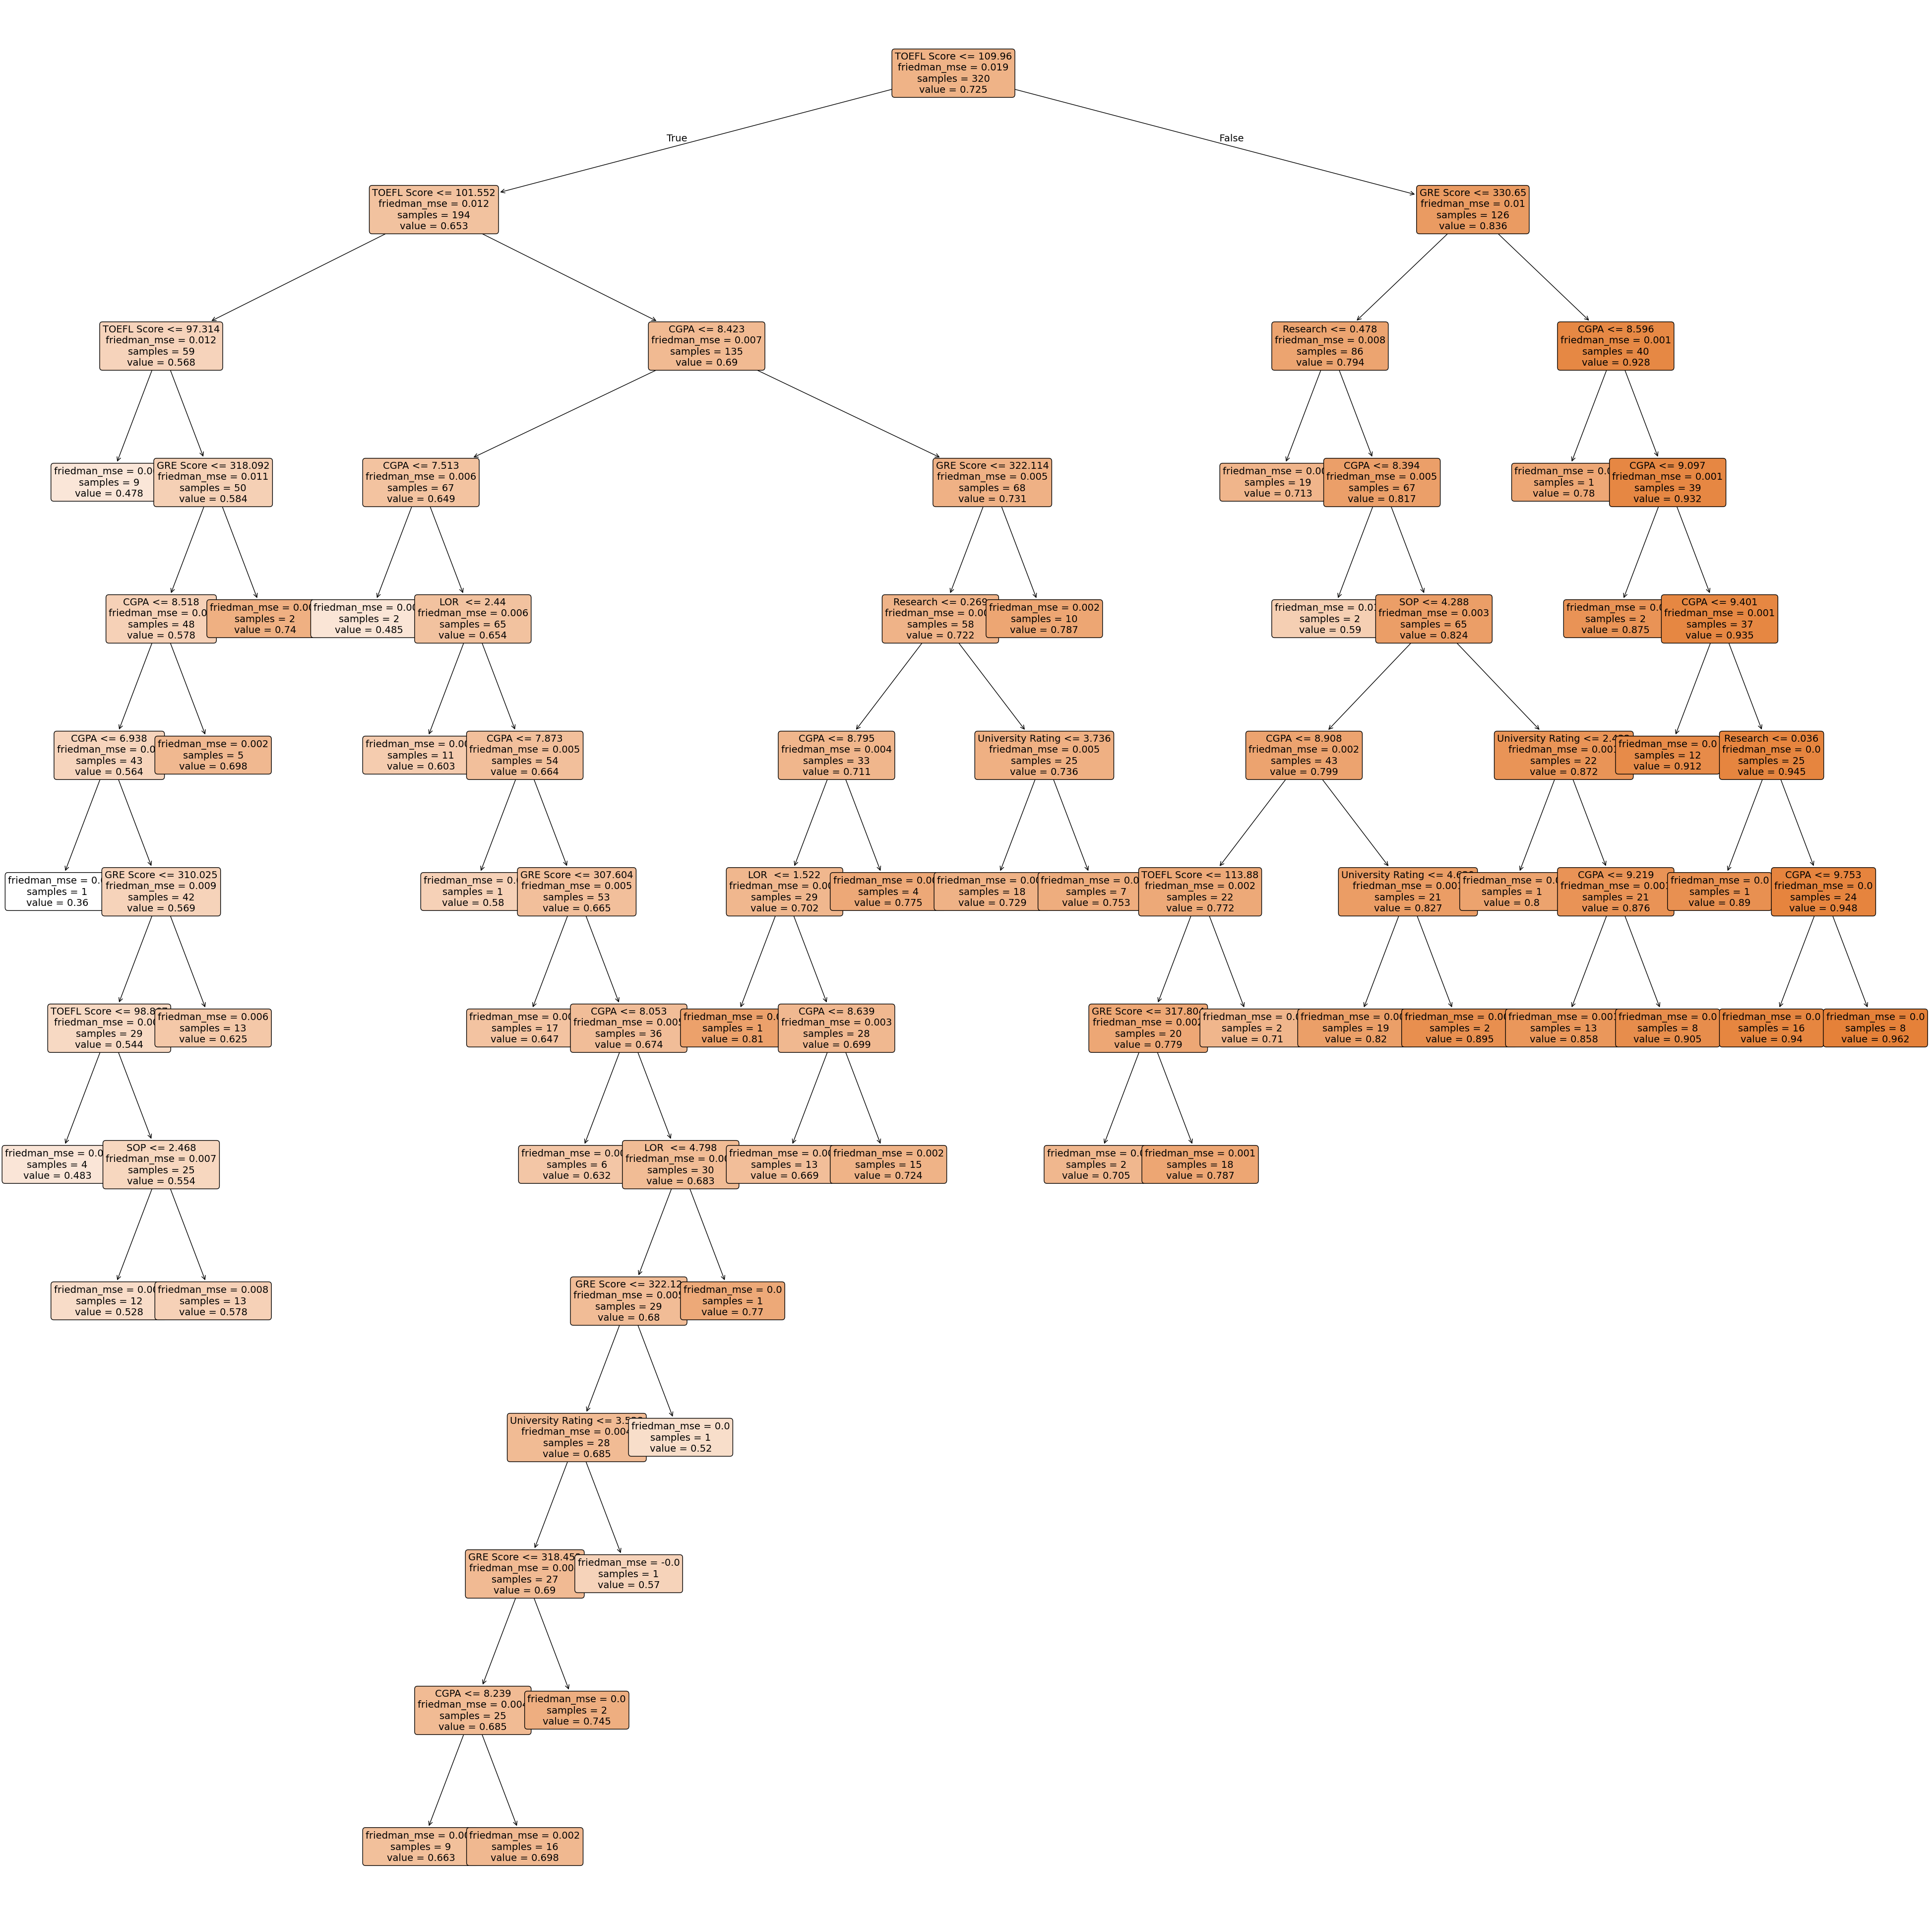

In [54]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [55]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)


--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT----------------------------------------------
[0.47777778]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


**sklearn.tree.DecisionTreeRegressor:**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

**score(self, X, y, sample_weight=None)**

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Parameters:
X : array-like, shape = (n_samples, n_features)
Test samples. For some estimators this may be a precomputed kernel matrix instead, shape = (n_samples, n_samples_fitted], where n_samples_fitted is the number of samples used in the fitting for the estimator.

y : array-like, shape = (n_samples) or (n_samples, n_outputs)
True values for X.

sample_weight : array-like, shape = [n_samples], optional
Sample weights.

Returns:
score : float
R^2 of self.predict(X) wrt. y.

Notes

The R2 score used when calling score on a regressor will use multioutput='uniform_average' from version 0.23 to keep consistent with metrics.r2_score. This will influence the score method of all the multioutput regressors (except for multioutput.MultiOutputRegressor). To specify the default value manually and avoid the warning, please either call metrics.r2_score directly or make a custom scorer with metrics.make_scorer (the built-in scorer 'r2' uses multioutput='uniform_average').

<a id="5"></a> <br>
5. **Random Forest Regression (RFR)**

Random forest regression combined by  multiple regression.

It chooses n examples, divides the data to sub datas and uses multiple trees.

                     data
                       |
                       |
                    n sample
                       |
                       |
                    sub_data
         tree1   tree2  tree3 .... tree n
         ________________________________
        |           average               |
         ________________________________
                     result
                     
            
                 
                 

RandomForestRegressor(**n_estimators** = 100, **random_state** = 42)

This means we will use 100 tree (DTR) and 42 sample. The algorithm chooses the n samples randomly. We gave a constant number for the random state, therefore the algorithm will select the same 42 examples on the next time.

In [56]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor


random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators = 100 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [57]:
y_rf=random_forest_reg.predict(x_test)
y_rf

array([0.6652, 0.7245, 0.9401, 0.8184, 0.5838, 0.9179, 0.5767, 0.4608,
       0.6788, 0.9065, 0.723 , 0.9394, 0.5179, 0.8991, 0.7219, 0.6711,
       0.7106, 0.4725, 0.7084, 0.9599, 0.6182, 0.6773, 0.7045, 0.5529,
       0.9441, 0.7998, 0.7313, 0.5765, 0.7095, 0.8072, 0.804 , 0.9429,
       0.6367, 0.4574, 0.7052, 0.6672, 0.7   , 0.6893, 0.632 , 0.9235,
       0.7489, 0.6423, 0.7598, 0.9492, 0.8791, 0.8403, 0.9645, 0.6548,
       0.9336, 0.8943, 0.9103, 0.7079, 0.7675, 0.9437, 0.5714, 0.5915,
       0.6902, 0.8427, 0.5731, 0.8762, 0.6411, 0.6468, 0.6788, 0.4532,
       0.6756, 0.6435, 0.6094, 0.8608, 0.8849, 0.7742, 0.6967, 0.821 ,
       0.9223, 0.8596, 0.5443, 0.7359, 0.6915, 0.5482, 0.8419, 0.7722])

# Decision Tree Regressor Optimization




In [61]:
# Evaluate best_dt_reg
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_reg = DecisionTreeRegressor(random_state=42) # Set random_state for reproducibility
grid_search_dt = GridSearchCV(dt_reg, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(x_train, y_train) # Changed X_train to x_train

best_dt_reg = grid_search_dt.best_estimator_
print("Best Decision Tree parameters:", grid_search_dt.best_params_)


Best Decision Tree parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


# Random forest Regressor Tuning

In [63]:
# Evaluate best_rf_reg
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0] # 'auto' is deprecated, use 1.0
}
rf_reg = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(rf_reg, param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='neg_mean_squared_error',  random_state=42, n_jobs=-1, verbose=1) # n_iter for number of samples


# Ensure x_train and y_train are defined and available from a previous cell
# RandomForestRegressor expects a 1D array for y, so use ravel()
random_search_rf.fit(x_train, y_train.ravel())

best_rf_reg = random_search_rf.best_estimator_
print("Best Random Forest parameters:", random_search_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}


In [64]:


print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [65]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.009449999999999998
RMSE for DT: 0.0972111104761179
MAE for DT: 0.06625
R² Score for DT: 0.634052260096388
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.7178393868664125
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [66]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.634052260096388
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7178393868664125
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239


In [67]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with rf without tuning----------------------------------------------")
b2=random_forest_reg.predict(c)
print(b2)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.47777778]
--------------------Prediction with rf without tuning----------------------------------------------
[0.4408]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


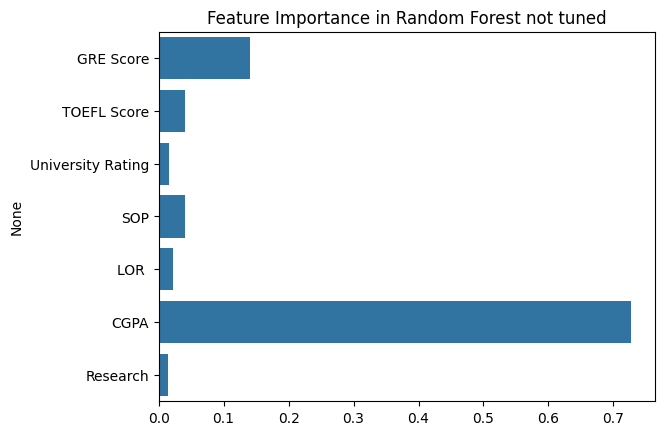

In [68]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()



In [69]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg1 = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20 )
# n_estimators = 900 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg1.fit(x_train,y_train)
y_rf1=random_forest_reg1.predict(x_test)
print("--------------------Result for RF  tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------------Result for RF  tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


In [70]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.634052260096388
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7178393868664125
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


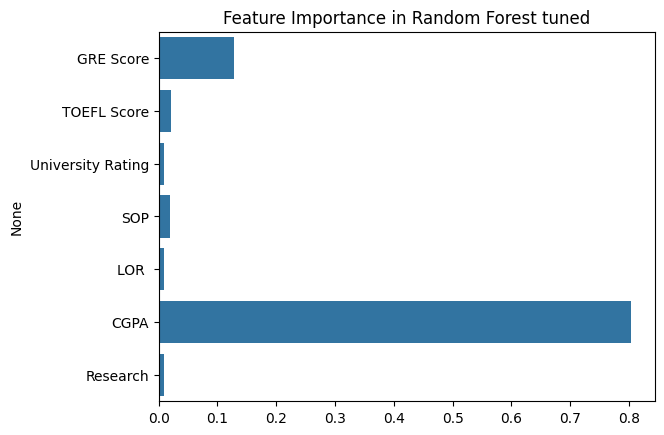

In [71]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg1.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()



Random forest tuned is the best model
CPGA and TOFL score have the hightes impact to make an accurate predcition.

In [72]:
print("--------------------Prediction with rf without tuning----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b3=random_forest_reg1.predict(c)
print(b3)

--------------------Prediction with rf without tuning----------------------------------------------
[0.47711632]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [73]:
import pickle
# Assume model is your trained ML model
with open('/content/drive/MyDrive/EDA/my_model.pkl', 'wb') as file: # Save to a specific directory
        pickle.dump(random_forest_reg1, file)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EDA/my_model.pkl'

In [ ]:
import pickle

# Example: Your trained model (replace with your own model)
model = 'random_forest_reg1'  # Dummy model, replace with your actual trained model

# Path to save the pickle file in Google Drive
model_path = '/content/drive/My Drive/Colab Notebooks/model.pkl'

# Save the model
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved to {model_path}")


Model saved to /content/drive/My Drive/Colab Notebooks/model.pkl


# Handling Multicollinearity in Linear Regression

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm # Import statsmodels.api and alias it as sm
# Add a constant for the intercept term for statsmodels
X_with_const = sm.add_constant(x)
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]
print(vif_data)

             feature          VIF
0              const  1529.672661
1          GRE Score     4.615516
2        TOEFL Score     4.288959
3  University Rating     2.919606
4                SOP     3.075504
5               LOR      2.431258
6               CGPA     5.207403
7           Research     1.543312


# Feature Based Selection Modelling

In [75]:
# Example cell from your notebook (ensure this is run before the error cell)
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

# Assume x_train and y_train are defined

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
tree_reg = DecisionTreeRegressor() # Define the regressor
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train) # Assuming x_train and y_train are defined

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test) # Assuming x_test and y_test are defined
print("Test Score (R2):", test_score)

# Explicitly assign best_model to best_dt_reg so it's available in subsequent cells
best_dt_reg = best_model

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_split=6, splitter='random')
Best Score (R2): 0.7068245716659891
Test Score (R2): 0.8152844449772523


In [76]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Needed for retraining tuned models

# --- Assume x, y, x_train, x_test, y_train, y_test are already defined ---
# --- Assume best_rf_reg (tuned Random Forest) and best_dt_reg (tuned Decision Tree)
# --- are already trained and available from previous steps.

# Placeholder for evaluation function (if not already defined)
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n--- {model_name} Performance ---")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    return r2, mae, mse, rmse

# --- Ensure best_dt_reg is defined ---
# Based on previous  code, best_model from GridSearchCV is likely the intended best_dt_reg.
# You need to run the cell where grid_search.fit(x_train, y_train) is performed
# and best_model = grid_search.best_estimator_ is assigned.
# Add the following line after that cell or ensure it's run:
# best_dt_reg = best_model # Assign the best Decision Tree model to best_dt_reg


# --- For comparison later, let's store initial tuned model performances ---
# (You might have already printed these in previous steps, but good for direct comparison)
print("--- Initial Tuned Model Performances (for comparison) ---")
# Changed X_test to x_test
initial_rf_r2, _, _, _ = evaluate_model(best_rf_reg, x_test, y_test, "Random Forest (Tuned - All Features)")
# Changed X_test to x_test
initial_dt_r2, _, _, _ = evaluate_model(best_dt_reg, x_test, y_test, "Decision Tree (Tuned - All Features)")
# Assuming you had a baseline linear regression, you'd evaluate it here too.
# For simplicity, we'll assume a lin_reg object from previous steps
# If you didn't run it yet, uncomment and run:
# lin_reg_full = LinearRegression()
# lin_reg_full.fit(x_train, y_train) # Changed X_train to x_train
# initial_lin_r2, _, _, _ = evaluate_model(lin_reg_full, x_test, y_test, "Linear Regression (All Features)") # Changed X_test to x_test


# --- Feature Selection-Based Modeling ---
print("\n--- Feature Selection using Tuned Random Forest ---")

# Get feature importances from the best Random Forest model
feature_importances = best_rf_reg.feature_importances_
features = x.columns # Assuming x is your full feature DataFrame from earlier steps
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances from Tuned Random Forest:")
print(importance_df)

# Select top 5 features
top_5_features = importance_df['Feature'].head(5).tolist()
print(f"\nTop 5 features selected: {top_5_features}")

# Create new datasets with only top 5 features
# Changed X_train to x_train and X_test to x_test
x_train_top5 = x_train[top_5_features]
x_test_top5 = x_test[top_5_features]

print(f"\nx_train_top5 shape: {x_train_top5.shape}")
print(f"x_test_top5 shape: {x_test_top5.shape}")

# Retrain models with top 5 features
print("\n--- Retraining Models with Top 5 Features ---")

# --- Linear Regression (with top 5) ---
lin_reg_top5 = LinearRegression()
# Changed X_train_top5 to x_train_top5 and y_train to y_train
lin_reg_top5.fit(x_train_top5, y_train)
# Changed X_test_top5 to x_test_top5 and y_test to y_test
r2_lin_top5, _, _, _ = evaluate_model(lin_reg_top5, x_test_top5, y_test, "Linear Regression (Top 5 Features)")


# --- Decision Tree (optimized, with top 5) ---
# Re-use the best hyperparameters found previously or define a new param_grid if needed
# For simplicity, we'll assume `param_grid_dt` is defined from the previous tuning step
# (If not, you'd need to define it here or fetch best_dt_reg.get_params())
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} # Define if not already in scope

dt_reg_top5_gs = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
# Changed X_train_top5 to x_train_top5 and y_train to y_train
dt_reg_top5_gs.fit(x_train_top5, y_train)
best_dt_reg_top5 = dt_reg_top5_gs.best_estimator_
print("\nBest Decision Tree parameters (Top 5 Features):", dt_reg_top5_gs.best_params_)
# Changed X_test_top5 to x_test_top5 and y_test to y_test
r2_dt_top5, _, _, _ = evaluate_model(best_dt_reg_top5, x_test_top5, y_test, "Decision Tree (Tuned, Top 5 Features)")


# --- Random Forest (optimized, with top 5) ---
# Re-use the best hyperparameters found previously or define a new param_dist if needed
# For simplicity, we'll assume `param_dist_rf` is defined from the previous tuning step
# (If not, you'd need to define it here or fetch best_rf_reg.get_params())
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0]
} # Define if not already in scope

rf_reg_top5_rs = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist_rf,
                                    n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                    random_state=42, n_jobs=-1, verbose=0)
# Changed X_train_top5 to x_train_top5 and y_train to y_train
rf_reg_top5_rs.fit(x_train_top5, y_train.ravel()) # Use ravel() as before for RF
best_rf_reg_top5 = rf_reg_top5_rs.best_estimator_
print("\nBest Random Forest parameters (Top 5 Features):", rf_reg_top5_rs.best_params_)
# Changed X_test_top5 to x_test_top5 and y_test to y_test
r2_rf_top5, _, _, _ = evaluate_model(best_rf_reg_top5, x_test_top5, y_test, "Random Forest (Tuned, Top 5 Features)")

# --- Compare Results ---
print("\n--- Summary: Performance Comparison (All Features vs. Top 5 Features) ---")

comparison_data = {
    'Model': ['Linear Regression (All Features)', 'Decision Tree (Tuned - All Features)', 'Random Forest (Tuned - All Features)',
              'Linear Regression (Top 5 Features)', 'Decision Tree (Tuned - Top 5 Features)', 'Random Forest (Tuned - Top 5 Features)'],
    'R2 Score': [
        # You'll need to fill these in from your initial evaluation steps
        # For example: initial_lin_r2, initial_dt_r2, initial_rf_r2
        # For demonstration purposes, I'll use placeholders. Replace with actual values.
        # Changed X_test to x_test
        linear_reg.score(x_test, y_test), # Score for original Linear Regression (assuming 'linear_reg' is the one trained on all data)
        initial_dt_r2,
        initial_rf_r2,
        r2_lin_top5,
        r2_dt_top5,
        r2_rf_top5
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.sort_values(by='R2 Score', ascending=False).to_string(index=False))

print("\nDiscussion on Feature Selection Impact:")
print("- Analyze if the R2 score significantly dropped for any model after feature selection.")
print("- Discuss if the simpler models (with fewer features) maintain comparable performance.")
print("- Consider if the reduced complexity and faster training times (for models with fewer features) outweigh any slight drop in performance.")

--- Initial Tuned Model Performances (for comparison) ---

--- Random Forest (Tuned - All Features) Performance ---
R-squared (R2): 0.8058
Mean Absolute Error (MAE): 0.0488
Mean Squared Error (MSE): 0.0050
Root Mean Squared Error (RMSE): 0.0708

--- Decision Tree (Tuned - All Features) Performance ---
R-squared (R2): 0.8153
Mean Absolute Error (MAE): 0.0506
Mean Squared Error (MSE): 0.0048
Root Mean Squared Error (RMSE): 0.0691

--- Feature Selection using Tuned Random Forest ---
Feature Importances from Tuned Random Forest:
             Feature  Importance
5               CGPA    0.335275
0          GRE Score    0.264998
1        TOEFL Score    0.154153
2  University Rating    0.096851
3                SOP    0.069722
4               LOR     0.055098
6           Research    0.023903

Top 5 features selected: ['CGPA', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP']

x_train_top5 shape: (320, 5)
x_test_top5 shape: (80, 5)

--- Retraining Models with Top 5 Features ---

--- Linea